In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
from glob import glob

In [81]:
filepaths = glob("." + "/states*.csv")
us_census = pd.concat(map(pd.read_csv, filepaths), ignore_index=True)
us_census = us_census.drop(["Unnamed: 0"], axis=1)

us_census.tail()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
55,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F
56,Kentucky,4397353,3.222993688007212%,85.2307484220019%,8.272317403065832%,0.1666366095581602%,1.1298467087466182%,0.046438232642019836%,$45285.80253623189,2164208M_2233145F
57,Louisiana,4625253,4.866489361702128%,54.978546099290796%,36.32624113475175%,0.48430851063829816%,1.669060283687941%,0.039184397163120555%,$44957.99376114082,2261156M_2364097F
58,Maine,1329100,1.4319088319088318%,93.70740740740736%,1.1344729344729356%,0.7883190883190888%,0.9658119658119669%,0.01566951566951567%,$49181.97435897436,650081M_679019F
59,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F


In [82]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [83]:
us_census.describe()

,TotalPop
count,6.000000e+01
mean,6.238516e+06
std,6.588488e+06
min,6.266040e+05
25%,2.030429e+06
50%,4.701414e+06
75%,7.303256e+06
max,3.842146e+07


In [84]:
us_census["Income"] = us_census["Income"].replace(to_replace="[$]", value="", regex=True)
us_census["Income"] = pd.to_numeric(us_census["Income"])

In [85]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F


In [86]:
population = us_census["GenderPop"].str.split("_", expand=True)
us_census["Men"] = population[0]
us_census["Women"] = population[1]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009M,10045763F


In [87]:
us_census["Men"] = us_census["Men"].replace(to_replace="[M]", value="", regex=True)
us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = us_census["Women"].replace(to_replace="[F]", value="", regex=True)
us_census["Women"] = pd.to_numeric(us_census["Women"])

In [88]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763.0


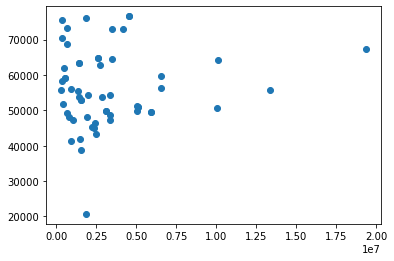

In [89]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.show() 

In [90]:
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])
us_census["Women"]

0      2630239.0
1      1841615.0
2       478041.0
3       340810.0
4     10045763.0
5      5123362.0
6      3081445.0
7       504536.0
8       939759.0
9      1390901.0
10      670717.0
11     4561386.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     2489527.0
19      349215.0
20     3342840.0
21     1506295.0
22    19334329.0
23     2630239.0
24     5913084.0
25     1942789.0
26     1990780.0
27     6534215.0
28     1869213.0
29      543273.0
30     1444150.0
31      318031.0
32     4195682.0
33     3497739.0
34      937789.0
35     2890732.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42      543273.0
43     2455167.0
44      419713.0
45     3331859.0
46    13367298.0
47     1444150.0
48     3057895.0
49     3455936.0
50     5038598.0
51     2727005.0
52     1536358.0
53     3081445.0
54     1558931.0
55     1453125.0
56     2233145.0
57     2364097.0
58      679019

In [91]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47     True
48    False
49    False
50    False
51    False
52    False
53     True
54     True
55    False
56    False
57    False
58    False
59     True
dtype: bool

In [92]:
us_census = us_census.drop_duplicates()

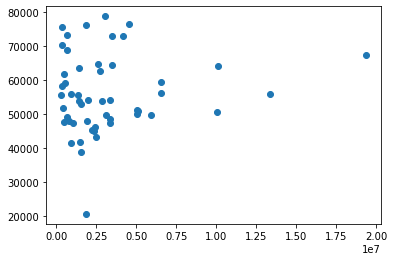

In [93]:
plt.scatter(us_census["Women"], us_census["Income"])
plt.show() 

In [94]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

In [95]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific']

us_census[races] = us_census[races].replace(to_replace="[%]", value="", regex=True)

for race in races:
    us_census[race] = pd.to_numeric(us_census[race])
    us_census[race] = us_census[race] / 100
    us_census[race] = us_census[race].mul(us_census["TotalPop"])
    us_census[race] = us_census[race].fillna(us_census["TotalPop"] - us_census.iloc[:, 2:8].sum(axis=1))
    us_census[race] = us_census[race].astype(float).round(0)

In [96]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Men            int64
Women        float64
dtype: object

In [97]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Colorado,5278906,1097188.0,3689722.0,187210.0,30292.0,140524.0,133970.0,64657.801787,2648667M_2630239F,2648667,2630239.0
1,Connecticut,3593222,560716.0,2431787.0,371829.0,4535.0,144519.0,668.0,76146.560588,1751607M_1841615F,1751607,1841615.0
2,Delaware,926454,81757.0,598792.0,192183.0,2407.0,30283.0,21032.0,61827.976636,448413M_478041F,448413,478041.0
3,District of Columbia,647484,59348.0,214343.0,335245.0,1299.0,21906.0,192.0,75466.363636,306674M_340810F,306674,340810.0
4,Florida,19645772,4192121.0,11607459.0,2979414.0,41345.0,448547.0,10120.0,50690.194987,9600009M_10045763F,9600009,10045763.0


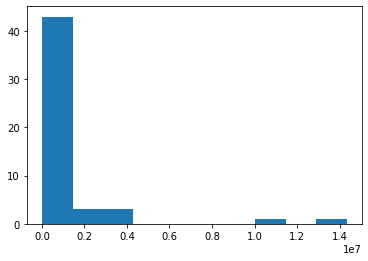

In [98]:
plt.hist(us_census["Hispanic"])
plt.show()

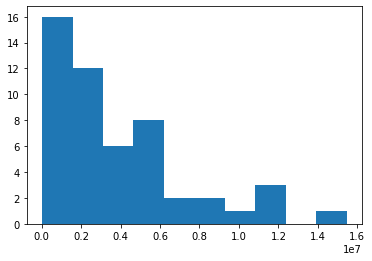

In [99]:
plt.hist(us_census["White"])
plt.show()


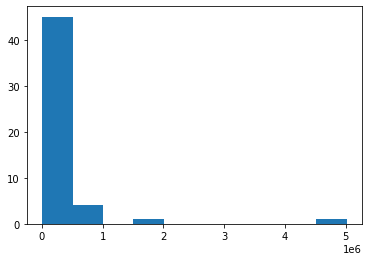

In [100]:
plt.hist(us_census["Asian"])
plt.show()

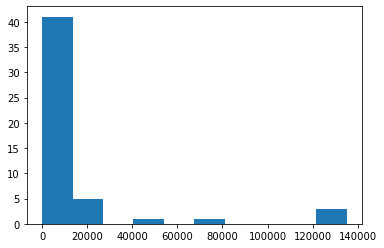

In [101]:
plt.hist(us_census["Pacific"])
plt.show()

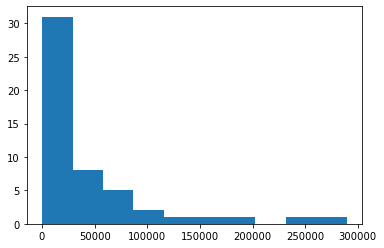

In [102]:
plt.hist(us_census["Native"])
plt.show()

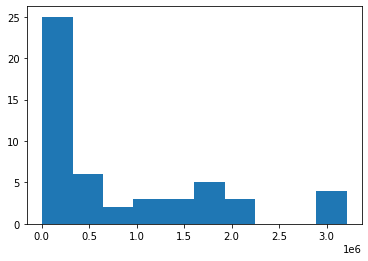

In [103]:
plt.hist(us_census["Black"])
plt.show()

In [104]:
us_census.drop_duplicates()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Colorado,5278906,1097188.0,3689722.0,187210.0,30292.0,140524.0,133970.0,64657.801787,2648667M_2630239F,2648667,2630239.0
1,Connecticut,3593222,560716.0,2431787.0,371829.0,4535.0,144519.0,668.0,76146.560588,1751607M_1841615F,1751607,1841615.0
2,Delaware,926454,81757.0,598792.0,192183.0,2407.0,30283.0,21032.0,61827.976636,448413M_478041F,448413,478041.0
3,District of Columbia,647484,59348.0,214343.0,335245.0,1299.0,21906.0,192.0,75466.363636,306674M_340810F,306674,340810.0
4,Florida,19645772,4192121.0,11607459.0,2979414.0,41345.0,448547.0,10120.0,50690.194987,9600009M_10045763F,9600009,10045763.0
5,Georgia,10006693,842388.0,5432264.0,3210978.0,18771.0,309972.0,4663.0,50811.082051,4883331M_5123362F,4883331,5123362.0
6,Missouri,6045448,244070.0,4685710.0,853745.0,21965.0,98208.0,6146.0,49763.987726,2964003M_3081445F,2964003,3081445.0
7,Montana,1014699,33169.0,876858.0,4356.0,71645.0,5788.0,733.0,47645.682836,510163M_F,510163,504536.0
8,Nebraska,1869365,172052.0,1516793.0,92650.0,16160.0,34752.0,1068.0,55916.469697,929606M_939759F,929606,939759.0
9,Nevada,2798636,758455.0,1489975.0,216604.0,30426.0,198584.0,16079.0,55526.525074,1407735M_1390901F,1407735,1390901.0


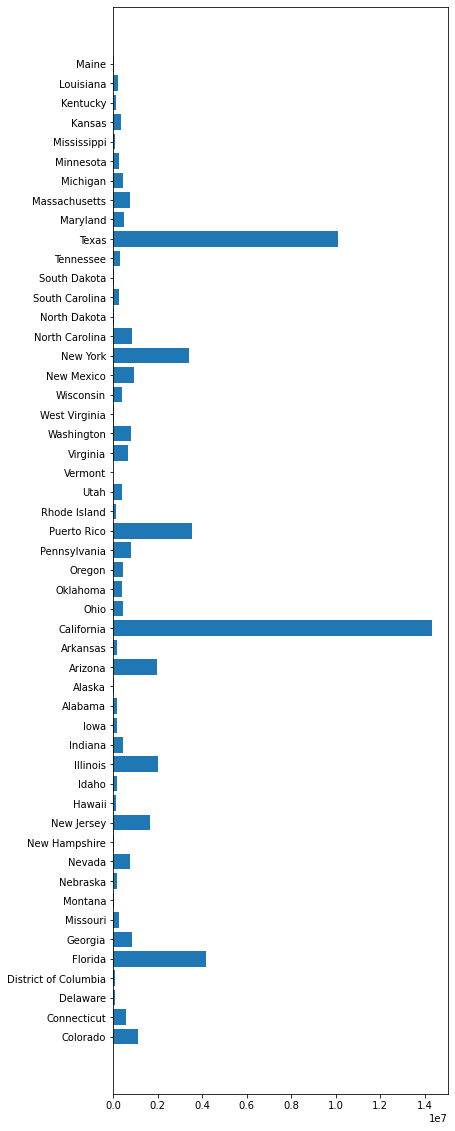

In [132]:
hispanics = plt.figure()
plt.barh(us_census["State"], us_census["Hispanic"])
hispanics.set_figheight(20)
plt.show()

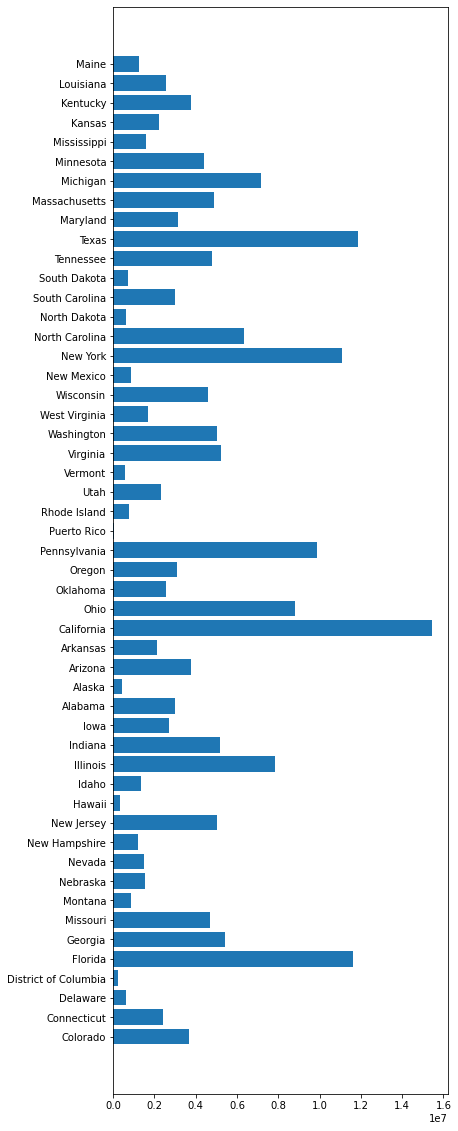

In [130]:
whites = plt.figure()
plt.barh(us_census["State"], us_census["White"])
whites.set_figheight(20)
plt.show()

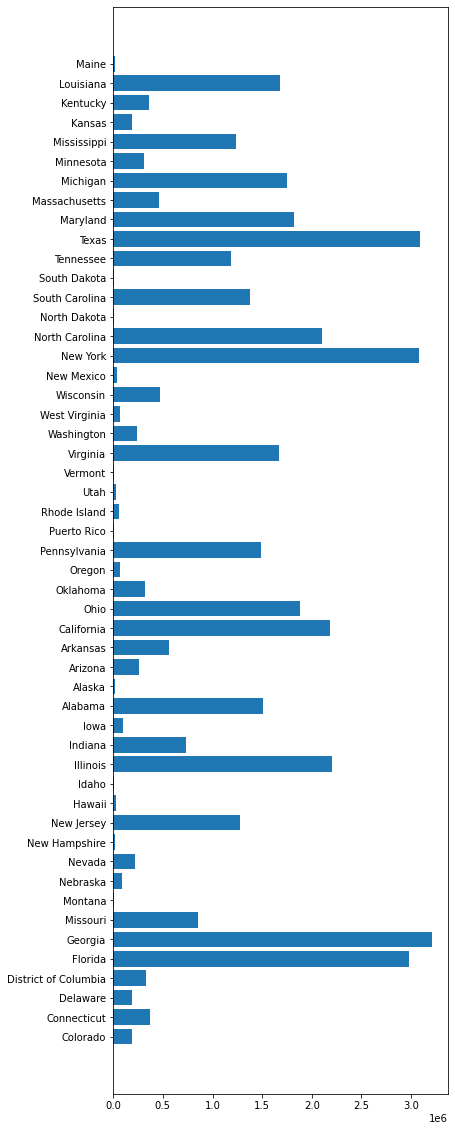

In [129]:
blacks = plt.figure()
plt.barh(us_census["State"], us_census["Black"])
blacks.set_figheight(20)
plt.show()

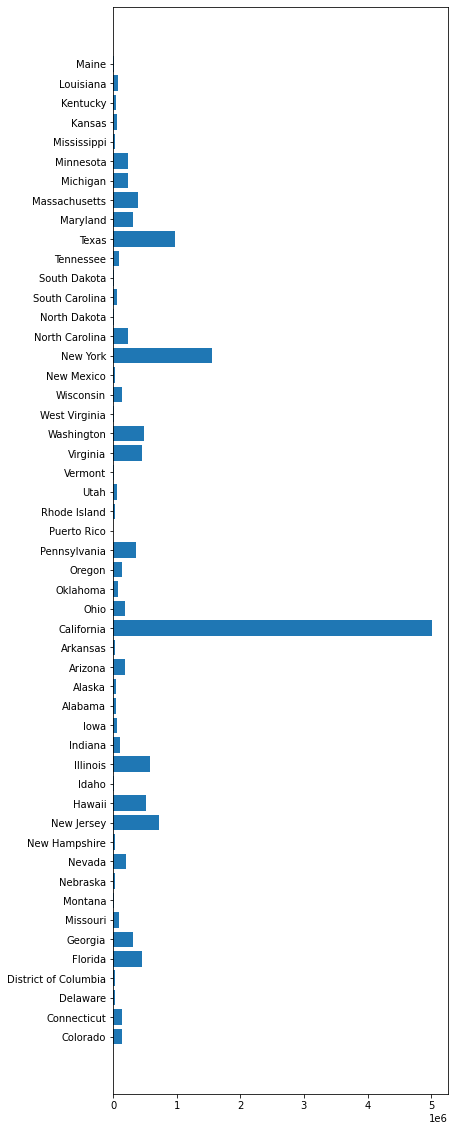

In [128]:
asians = plt.figure()
plt.barh(us_census["State"], us_census["Asian"])
asians.set_figheight(20)
plt.show()

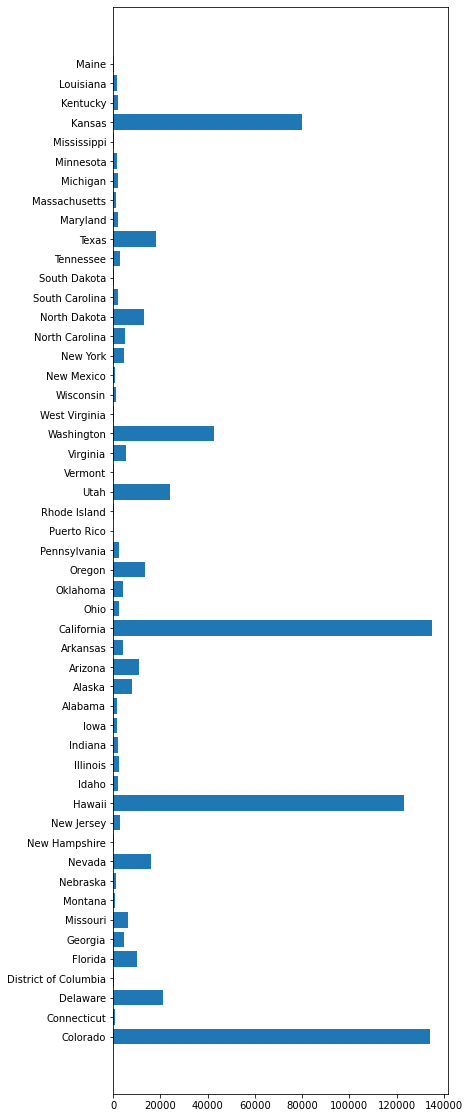

In [127]:
pacifics = plt.figure()
plt.barh(us_census["State"], us_census["Pacific"])
pacifics.set_figheight(20)
plt.show()

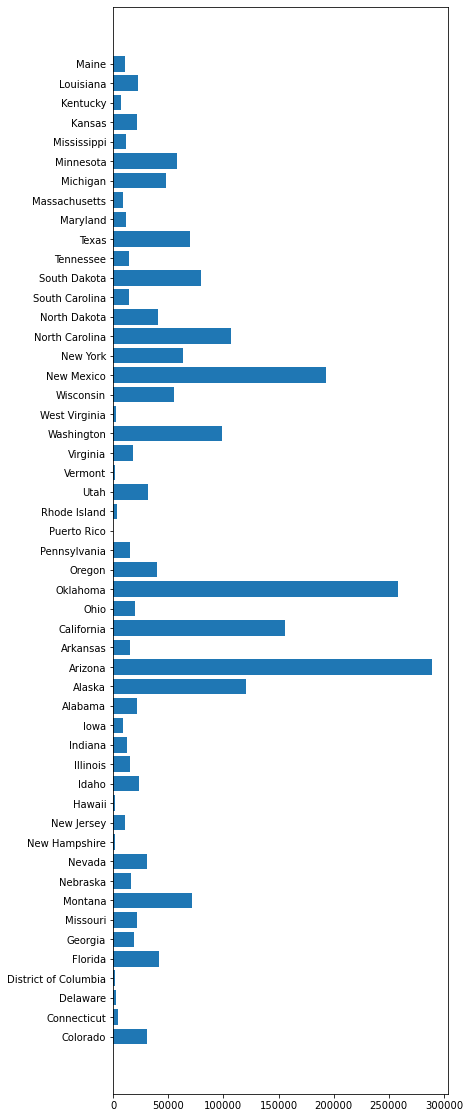

In [124]:
natives = plt.figure()
plt.barh(us_census["State"], us_census["Native"])
natives.set_figheight(20)
plt.show()